# Project

In this Project, you will bring together many of the tools and techniques that you have learned throughout this course into a final project. You can choose from many different paths to get to the solution. 

### Business scenario

You work for a training organization that recently developed an introductory course about machine learning (ML). The course includes more than 40 videos that cover a broad range of ML topics. You have been asked to create an application that will students can use to quickly locate and view video content by searching for topics and key phrases.

You have downloaded all of the videos to an Amazon Simple Storage Service (Amazon S3) bucket. Your assignment is to produce a dashboard that meets your supervisor’s requirements.

## Project steps

To complete this project, you will follow these steps:

1. [Transcribing the videos](#2.-Transcribing-the-videos)
2. [Normalizing the text](#3.-Normalizing-the-text)
3. [Extracting key phrases and topics](#4.-Extracting-key-phrases-and-topics)
4. [Creating the dashboard](#5.-Creating-the-dashboard)

In [1]:
# required libraries
# %pip install SpeechRecognition==3.1.3
# %pip install keybert
# %pip install gensim
# %pip install moviepy
# %pip install pymysql
# %pip install pyldavis
# %pip install pytube
# %pip install nltk

## Download Data


## 2. Transcribing the videos
 ([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to implement your solution to transcribe the videos. 

In [2]:
import sys
print(sys.executable)

d:\VideoTopicExtraction\venv\Scripts\python.exe


In [3]:
import speech_recognition as sr
import os
import subprocess
import wave, math, contextlib
from moviepy.audio.io.AudioFileClip import AudioFileClip

In [4]:

def get_transcript_file(source_file,destination_file):
    audioclip = AudioFileClip(source_file)
    audioclip.write_audiofile(f"{destination_file}.wav")
    with contextlib.closing(wave.open(f'{destination_file}.wav','r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    
    total_duration = math.ceil(duration / 60)
    r = sr.Recognizer()

    for i in range(0, total_duration):
        with sr.WavFile(f'{destination_file}.wav') as source:
            audio = r.record(source, offset=i*60, duration=60)
        f = open(f"{destination_file}.txt", "a")
#         print(r.recognize_google(audio,language='en-US',show_all = True ))
        f.write(r.recognize_google(audio,language='en-CA'))
        f.write(" ")
        f.close()


In [5]:
# Initialize recognizer class (for recognizing the speech)
rootdir = './data'
desitnation_folder = './transcriptions'

os.makedirs(rootdir, exist_ok=True)
os.makedirs(desitnation_folder, exist_ok=True)

for fname in os.listdir(rootdir):
    # print(fname)
    sourcename = os.path.join(rootdir,fname)
    dest_name =  os.path.join(desitnation_folder,fname.split('.')[0]) 
    try:
        get_transcript_file(sourcename, dest_name)
    except:
        pass
    


MoviePy - Writing audio in ./transcriptions\3.wav


MoviePy - Done.


## 3. Normalizing the text
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to perform any text normalization steps that are necessary for your solution.

In [6]:

import re
import nltk
import gensim 
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhanv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhanv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jhanv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jhanv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jhanv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
def clean_text(lst):
    cleaned_text = []
    stopword = stopwords.words("english")
    
    ## Text Cleaning (Removing Punctuations, Stopwords, Tokenization and Lemmatization)
    for text in lst:
        text = str(text).lower()
        text = re.sub(r'[^\w ]+', "", text)
        text = " ".join([lemmatizer.lemmatize(word,pos='v') for word in word_tokenize(text) if not word in set(stopword) and len(word)>3])
        if text != '':
            cleaned_text.append(text)
            
    norm_text = ' '.join(cleaned_text)
    return norm_text

In [8]:
desitnation_folder = './transcriptions'

norm_text = ''
for file in os.listdir(desitnation_folder):
    if file.endswith(".txt"):
        file = os.path.join(desitnation_folder,file)
        with open(file, "r") as file:
            text = file.read()
            text = text.split()
            text = clean_text(text)
            norm_text = " ".join([norm_text,text])
print(norm_text)

 theres hype neural network perhaps hype justify give well theyre work turn almost economic value create network type machine learn call supervisor learn let mean let examples supervise learn input want learn function output example sell house price prediction application feature home output estimate price examples neural network apply effectively possibly single lucrative application deep learn today online advertise maybe inspire certainly lucrative implant information website think show information user neural network get good predict whether click show show users youre likely click incredibly lucrative application neural network multiple company ability show likely click direct impact bottom line large online advertise company computer vision also make huge stride last several years mostly deep learn might even image output index 1000 try tell picture might thousand different image might tag think recent progressive recognition also excite input audio clip network machine translati

## 4. Extracting key phrases and topics
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to extract the key phrases and topics from the videos.

In [9]:
# Write your answer/code here
from keybert import KeyBERT

def get_keyphrases(full_text):
    kw_model = KeyBERT(model='all-mpnet-base-v2')
    keywords = kw_model.extract_keywords(full_text, 

                                         keyphrase_ngram_range=(1, 3), 

                                         stop_words='english', 

                                         highlight=False,

                                         top_n=50)
    keywords_list= list(dict(keywords).keys())
    return keywords_list

In [10]:
keyphrase = get_keyphrases(norm_text)
print(keyphrase)

['lucrative application neural', 'examples neural network', 'think applications neural', 'applications neural', 'neural network hype', 'application neural', 'applications neural network', 'neural network useful', 'examples neural', 'application neural network', 'neural network later', 'neural network', 'neural network computers', 'neural network good', 'suggest convolutional neural', 'neural network thank', 'user neural', 'neural network apply', 'type neural network', 'applications convolutional neural', 'like example convolutional', 'neural network architecture', 'price examples neural', 'rnns', 'information user neural', 'hear neural network', 'different type neural', 'convolutional neural', 'data hear neural', 'rnns use applications', 'application deep learn', 'neural network successes', 'deep learn', 'deep learn today', 'user neural network', 'deep learn right', 'applications machine learn', 'deep learn thank', 'useful different applications', 'input want learn', 'thank neural netw

In [11]:
def make_biagram(data,tokens):
    bigram = gensim.models.Phrases(data, min_count=20, threshold=100) # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return [bigram_mod[doc] for doc in tokens]  

In [12]:
def topic_modeling(data,num_of_topics):

    data = data.split(' ')
    tokens = []
    for text in data:
        text = word_tokenize(text)
        tokens.append(text)
        
    # Make Biagrams
    tokens = make_biagram(data=data,tokens=tokens)

    # Corpora Dictionary
    dictionary = corpora.Dictionary(tokens)

    doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokens]

    lda_model =  gensim.models.LdaModel(doc_term_matrix,  
                                       num_topics = num_of_topics,     
                                       id2word = dictionary,                                    
                                       passes = 2,
                                       chunksize=10,
                                       update_every=1,
                                       alpha='auto',
                                       per_word_topics=True,
                                       random_state=42
                                       )


    for idx, topic in lda_model.print_topics(-1):
        print("Topic: {} \nWords: {}".format(idx, topic ))
        print("\n")
    
    return lda_model,doc_term_matrix,dictionary


In [13]:

num_topics = 5
lda_model,corpus,id2word = topic_modeling(norm_text,num_topics)
print("whole topic list:",lda_model)


Topic: 0 
Words: 0.122*"well" + 0.112*"unstructured" + 0.063*"better" + 0.044*"applications" + 0.032*"use" + 0.028*"make" + 0.018*"ability" + 0.017*"hear" + 0.016*"compare" + 0.016*"computers"


Topic: 1 
Words: 0.232*"data" + 0.092*"much" + 0.080*"quite" + 0.051*"turn" + 0.038*"work" + 0.023*"company" + 0.022*"thank" + 0.021*"advertise" + 0.019*"interpret" + 0.012*"deep"


Topic: 2 
Words: 0.087*"structure" + 0.062*"many" + 0.045*"economic" + 0.042*"learn" + 0.035*"mean" + 0.027*"supervise" + 0.025*"theyre" + 0.023*"recognition" + 0.023*"also" + 0.021*"examples"


Topic: 3 
Words: 0.191*"network" + 0.065*"create" + 0.059*"might" + 0.052*"image" + 0.051*"even" + 0.033*"process" + 0.032*"know" + 0.029*"databases" + 0.028*"years" + 0.025*"recognize"


Topic: 4 
Words: 0.098*"natural" + 0.059*"neural" + 0.056*"value" + 0.039*"think" + 0.036*"text" + 0.031*"like" + 0.031*"recently" + 0.030*"talk" + 0.021*"understand" + 0.020*"people"


whole topic list: LdaModel<num_terms=264, num_topics=5

Topic 0: Unstructured Data Challenges

Topic 1: Big Data & Ads

Topic 2: Structured Data & Supervised Learning

Topic 3: Neural Networks for Vision

Topic 4: NLP & Understanding Text

## 5. Creating the dashboard
([Go to top](#Capstone-8:-Bringing-It-All-Together))

Use this section to create the dashboard for your solution.`

In [14]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.004202  0.082146       1        1  23.787905
0      0.005334  0.123588       2        1  21.794756
4      0.004530  0.074917       3        1  21.344281
1     -0.200586 -0.131754       4        1  16.704199
3      0.186519 -0.148896       5        1  16.368860, topic_info=             Term       Freq      Total Category  logprob  loglift
141          data  46.000000  46.000000  Default  30.0000  30.0000
3         network  37.000000  37.000000  Default  29.0000  29.0000
7            well  31.000000  31.000000  Default  28.0000  28.0000
179  unstructured  29.000000  29.000000  Default  27.0000  27.0000
223       natural  25.000000  25.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
259          take   0.985827   8.951394   Topic5  -5.2727  -0.3963
261         video   0.985565   8.951547   Topic5  -5.2729  -0.3966
258       decades   0.971539   8.918618   Topic5  -5.2873  -0.4072
260          next   0.970957   8.918817   Topic5  -5.2879  -0.4078
248          find   0.761659   6.902991   Topic5  -5.5306  -0.3944

[252 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
66        2  0.908455   ability
235       1  0.170736  accurate
235       2  0.170736  accurate
235       3  0.341472  accurate
235       4  0.170736  accurate
...     ...       ...       ...
242       2  0.156566     would
242       3  0.156566     would
242       4  0.156566     would
242       5  0.156566     would
80        5  0.817965     years

[297 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 4])

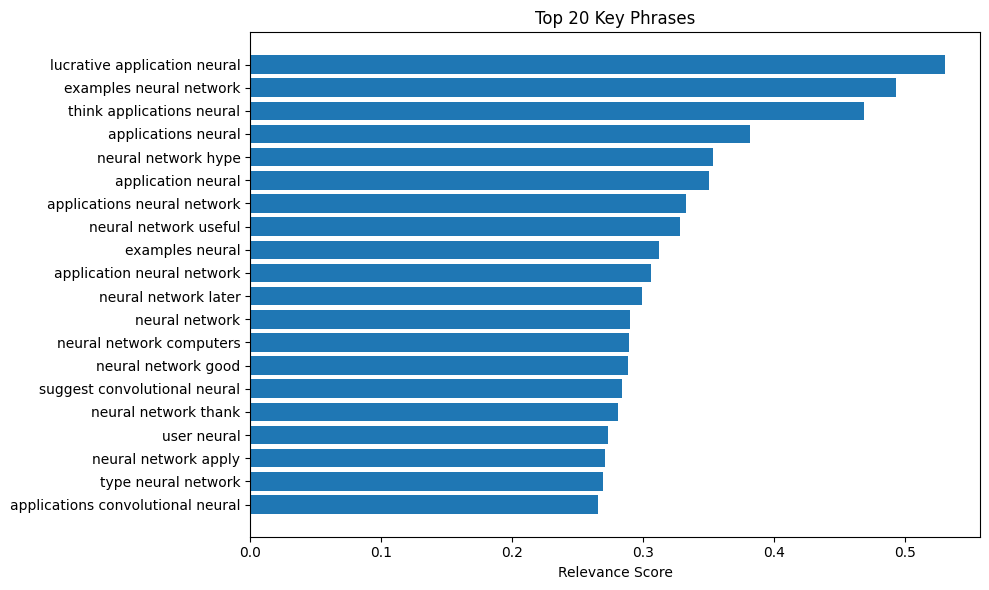

In [16]:
# %pip install matplotlib

import matplotlib.pyplot as plt

# Example: plot top 20 key phrases
top_k = keyphrase[:20]
kw_model = KeyBERT(model='all-mpnet-base-v2')
phrases = [phrase for phrase in top_k]
scores = [score for phrase, score in kw_model.extract_keywords(norm_text, top_n=20)]

plt.figure(figsize=(10,6))
plt.barh(phrases[::-1], scores[::-1])
plt.xlabel("Relevance Score")
plt.title("Top 20 Key Phrases")
plt.tight_layout()

plt.savefig("keyphrases.png")
plt.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


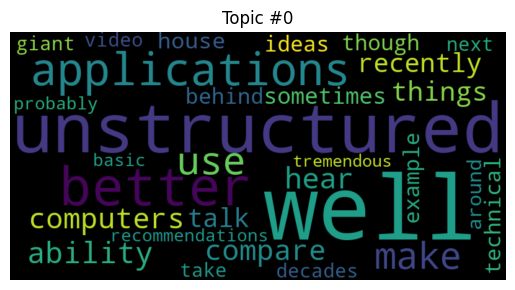

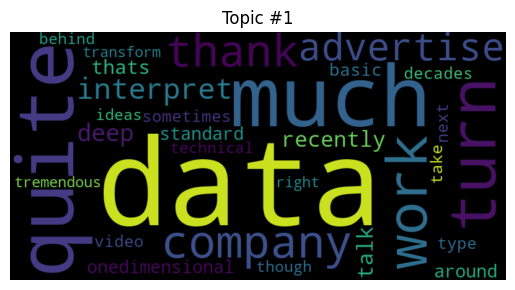

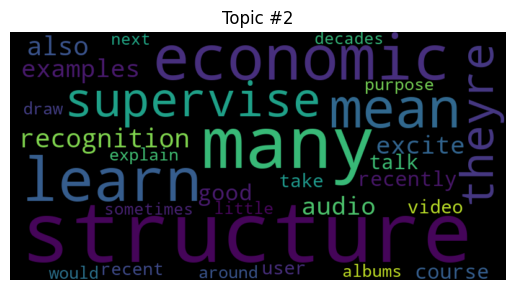

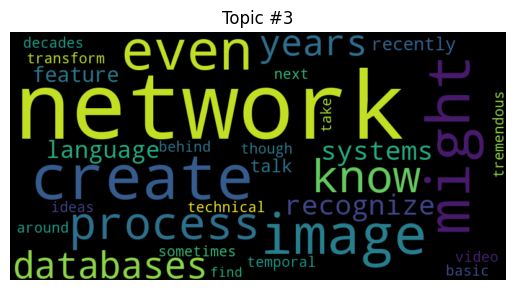

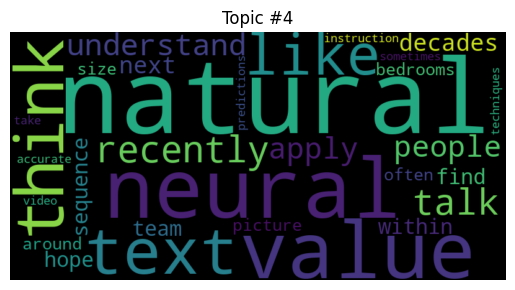

In [ ]:
# %pip install wordcloud

from wordcloud import WordCloud

for i in range(num_topics):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(lda_model.show_topic(i, topn=30)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.savefig(f"wordcloud_topic_{i}.png")
    plt.show()
